In [1]:
import pandas as pd

# Load the dataset (replace with your file path)
file_path = 'hospital_readmissions.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the data
data.head()


,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


## Patient Readmission Analysis

This project focuses on analyzing patient readmission data to uncover patterns and build predictive models.  
The notebook is divided into the following sections:  
1. **Data Loading and Exploration**  
2. **Data Preprocessing**  
3. **Exploratory Data Analysis (EDA)**   
4. **Evaluation and Insights**

---

### 1. Data Loading and Exploration

In this section, we load the patient readmission dataset and inspect its structure to understand the data columns and sample values.




In [1]:
# Import the necessary library
import pandas as pd

# Load the dataset (replace 'hospital_readmissions.csv' with your actual file path)
file_path = 'hospital_readmissions.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [2]:
# Check for missing values
data.isnull().sum()

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64

In [3]:
# Count the number of instances for each category in the 'readmitted' column
readmitted_counts = data['readmitted'].value_counts()

# Display the counts
print(readmitted_counts)

readmitted
no     13246
yes    11754
Name: count, dtype: int64


In [4]:
# Count readmissions by age group
age_readmitted_counts = data.groupby('age')['readmitted'].value_counts().unstack()

# Display the results
print(age_readmitted_counts)

readmitted    no   yes
age                   
[40-50)     1405  1127
[50-60)     2486  1966
[60-70)     3143  2770
[70-80)     3501  3336
[80-90)     2277  2239
[90-100)     434   316


### 3. Statistical Analysis: Chi-Square Test for Independence

This section performs a **Chi-Square Test for Independence** to determine whether there is a significant association between a patient's age and their readmission status. The test is based on the contingency table generated from the dataset.

Steps:  
1. Create a contingency table that shows the relationship between age and readmission status.  
2. Use the `chi2_contingency` function from the `scipy.stats` module to compute the test statistic, p-value, degrees of freedom, and expected frequencies.  
3. Interpret the p-value to determine whether to reject the null hypothesis.


In [5]:
# Import the chi-square test function from scipy.stats
from scipy.stats import chi2_contingency

# Step 1: Create a contingency table to show the relationship between age and readmission status
contingency_table = data.groupby('age')['readmitted'].value_counts().unstack()

# Step 2: Perform the Chi-Square Test for Independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Step 3: Display the test results
print("Chi-square Statistic:", chi2)  # The test statistic
print("Degrees of Freedom:", dof)     # The degrees of freedom for the test
print("P-value:", p)                  # The p-value to assess significance

# Step 4: Interpret the p-value to determine statistical significance
if p < 0.05:
    print("There is a significant association between age and readmission status (reject null hypothesis).")
else:
    print("There is no significant association between age and readmission status (fail to reject null hypothesis).")


Chi-square Statistic: 48.787297263120706
Degrees of Freedom: 5
P-value: 2.4528660957495614e-09
There is a significant association between age and readmission status (reject null hypothesis).


In [6]:
# Calculate percentage distribution
percentage_table = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# Display the percentage table
print(percentage_table)

readmitted         no        yes
age                             
[40-50)     55.489731  44.510269
[50-60)     55.840072  44.159928
[60-70)     53.154067  46.845933
[70-80)     51.206670  48.793330
[80-90)     50.420726  49.579274
[90-100)    57.866667  42.133333


### 4. Data Visualization: Readmissions by Age Group (Percentage)

In this section, we visualize the readmission distribution across different age groups in percentage terms. This helps to understand the proportion of readmitted vs non-readmitted patients within each age group.

Steps:  
1. Calculate the percentage distribution of readmission counts by age group.  
2. Plot the data as a bar chart, showing the side-by-side comparison of readmission status for each age group.  
3. Customize the plot with titles, labels, and legends for clarity.


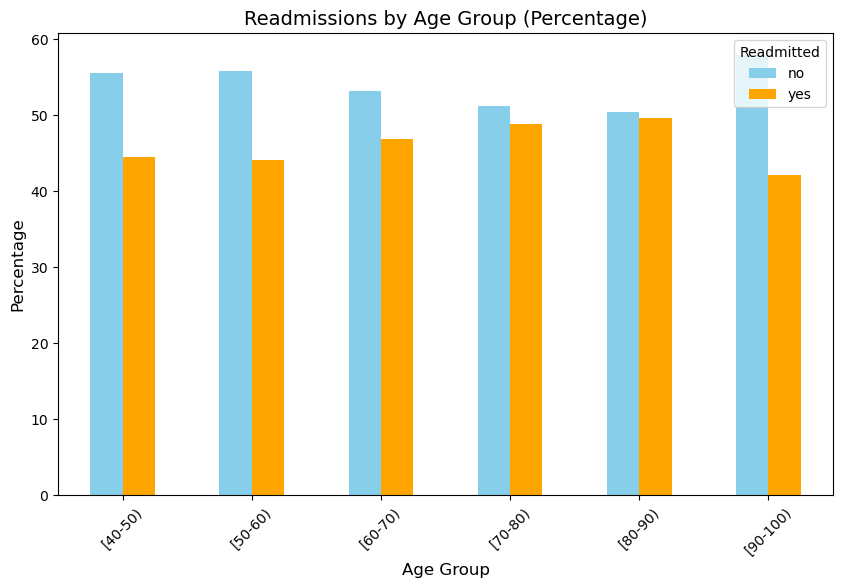

In [8]:
import matplotlib.pyplot as plt

# Calculate the percentage distribution of readmission counts by age group
contingency_table = data.groupby('age')['readmitted'].value_counts().unstack()
percentage_table = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# Plotting the bars side by side
ax = percentage_table.plot(kind='bar', stacked=False, figsize=(10, 6), color=['skyblue', 'orange'])

# Add titles and labels
plt.title('Readmissions by Age Group (Percentage)', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend(title='Readmitted', loc='upper right')
plt.xticks(rotation=45)
plt.show()


### 5. Analyzing Association Between Medical Specialty and Readmission

In this section, we investigate if there is any significant association between the medical specialty of patients and their readmission status. We start by visualizing a contingency table that shows the counts of readmissions for each medical specialty. Then, we perform a chi-square test to assess whether there is a statistically significant relationship between these two variables.

Steps:
1. Construct the contingency table for medical specialty and readmission status.  
2. Visualize the contingency table using a plot.  
3. Perform the chi-square test to assess the association.  
4. Display the test results and provide an interpretation based on the p-value.


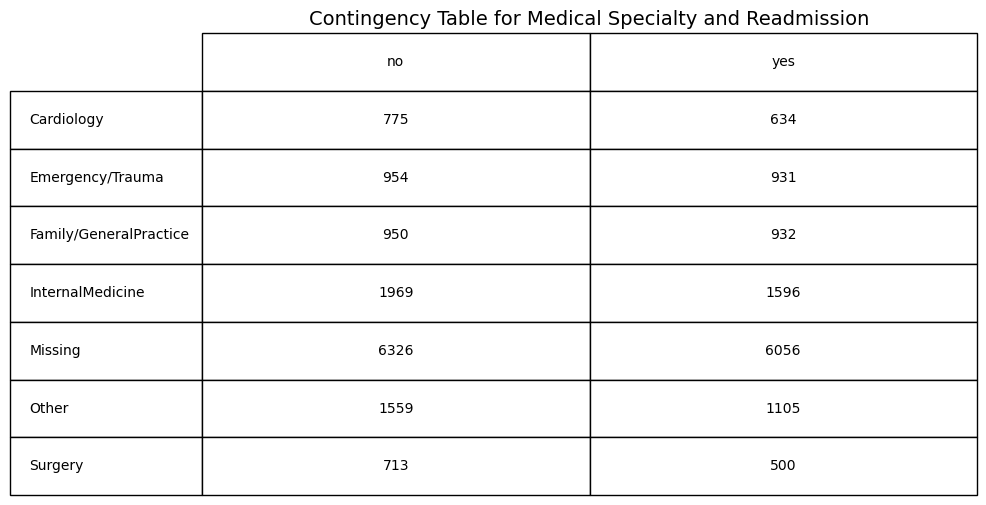


Chi-square Statistic: 85.51193444574233
Degrees of Freedom: 6
P-value: 2.5857749465869964e-16
There is a significant association between medical specialty and readmission status (reject null hypothesis).


In [14]:
# Import necessary libraries for data handling and statistical analysis
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Step 1: Construct the contingency table for medical specialty and readmission status
specialty_table = data.groupby('medical_specialty')['readmitted'].value_counts().unstack()  # Group by medical specialty and readmission status

# Step 2: Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(10, 6))  # Set up a plot with defined figure size

# Hide axes as we are displaying a table
ax.axis('off')

# Plot the contingency table as a table on the plot
table = ax.table(cellText=specialty_table.values,  # Table data
                colLabels=specialty_table.columns,  # Column labels (readmission statuses)
                rowLabels=specialty_table.index,  # Row labels (medical specialties)
                loc='center',  # Center the table on the plot
                cellLoc='center',  # Center text within each cell
                colLoc='center',  # Center column labels
                bbox=[0, 0, 1, 1])  # Make the table take up full space in the plot

# Manually set solid borders for all table cells to enhance visibility
for (i, j), cell in table.get_celld().items():
    cell.set_edgecolor('black')  # Set edge color to black
    cell.set_linewidth(1)  # Set line width to 1 for solid lines

# Display the table with a title
plt.title('Contingency Table for Medical Specialty and Readmission', fontsize=14)  # Title for the plot
plt.show()  # Display the plot containing the table

# Step 3: Perform the chi-square test to evaluate the association
chi2, p, dof, expected = chi2_contingency(specialty_table.fillna(0))  # Perform the chi-square test (fill NaNs with 0)

# Step 4: Display chi-square test results
print("\nChi-square Statistic:", chi2)  # Display chi-square statistic
print("Degrees of Freedom:", dof)  # Display degrees of freedom
print("P-value:", p)  # Display p-value from the test

# Interpretation: Decision based on p-value
if p < 0.05:
    print("There is a significant association between medical specialty and readmission status (reject null hypothesis).")
else:
    print("There is no significant association between medical specialty and readmission status (fail to reject null hypothesis).")
